1. Import necessary libraries for data manipulation and visualization.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Load the training dataset and display the first few rows to understand its structure.

In [58]:
df_train = pd.read_csv('train.csv', parse_dates=['DATE'], index_col='DATE')
df_train.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,,,,
2014-01-01,BGM00041891,"OSMANY INTERNATIONAL, BG",24.963,91.867,15.2,0.0,62,80.0,NaN
2014-01-02,BGM00041891,"OSMANY INTERNATIONAL, BG",24.963,91.867,15.2,0.0,65,78.0,55.0
2014-01-03,BGM00041891,"OSMANY INTERNATIONAL, BG",24.963,91.867,15.2,0.0,63,77.0,NaN
2014-01-04,BGM00041891,"OSMANY INTERNATIONAL, BG",24.963,91.867,15.2,0.0,64,77.0,52.0
2014-01-05,BGM00041891,"OSMANY INTERNATIONAL, BG",24.963,91.867,15.2,0.0,61,NaN,52.0


3. Load the test dataset and display the first few rows to understand its structure.

In [59]:
df_test = pd.read_csv('test.csv', parse_dates=['DATE'], index_col='DATE')
df_test.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,,
2021-01-01,BGM00041891,"OSMANY INTERNATIONAL, BG",24.963,91.867,15.2,0.0,",,S",67,"H,,S",83.0,",,S",56.0,",,S"
2021-01-02,BGM00041891,"OSMANY INTERNATIONAL, BG",24.963,91.867,15.2,0.0,",,S",67,"H,,S",NaN,NaN,57.0,",,S"
2021-01-03,BGM00041891,"OSMANY INTERNATIONAL, BG",24.963,91.867,15.2,0.0,",,S",69,"H,,S",83.0,",,S",NaN,NaN
2021-01-04,BGM00041891,"OSMANY INTERNATIONAL, BG",24.963,91.867,15.2,0.0,",,S",68,"H,,S",84.0,",,S",59.0,",,S"
2021-01-05,BGM00041891,"OSMANY INTERNATIONAL, BG",24.963,91.867,15.2,0.0,",,S",70,"H,,S",84.0,",,S",59.0,",,S"


4. Drop unnecessary columns from the training dataset to focus on relevant features.

In [60]:
df_train.drop(columns=['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION'], inplace=True)

5. Drop unnecessary columns from the test dataset to focus on relevant features.

In [61]:
df_test.drop(columns=['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'PRCP_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES',	'TMIN_ATTRIBUTES'], inplace=True)

6. Check the shape of the training dataset to understand the number of rows and columns.

In [62]:
df_train.shape

(2120, 4)

7. Get a summary of the training dataset, including data types and non-null counts.

In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2120 entries, 2014-01-01 to 2020-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    2118 non-null   float64
 1   TAVG    2120 non-null   int64  
 2   TMAX    1860 non-null   float64
 3   TMIN    1592 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 82.8 KB


8. Get descriptive statistics of the training dataset to understand the distribution of the data.

In [64]:
df_train.describe()

,PRCP,TAVG,TMAX,TMIN
count,2118.000000,2120.000000,1860.000000,1592.000000
mean,0.493215,78.142453,88.122581,70.584799
std,0.968353,6.497285,6.103996,7.785002
min,0.000000,60.000000,65.000000,49.000000
25%,0.000000,74.000000,84.000000,64.000000
50%,0.010000,80.000000,89.000000,72.000000
75%,0.570000,83.000000,93.000000,78.000000
max,8.290000,94.000000,103.000000,84.000000


9. Check the shape of the test dataset to understand the number of rows and columns.

In [65]:
df_test.shape

(18, 4)

10. Get a summary of the test dataset, including data types and non-null counts.

In [66]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18 entries, 2021-01-01 to 2021-01-18
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    18 non-null     float64
 1   TAVG    18 non-null     int64  
 2   TMAX    17 non-null     float64
 3   TMIN    16 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 720.0 bytes


11. Get descriptive statistics of the test dataset to understand the distribution of the data.

In [67]:
df_test.describe()

,PRCP,TAVG,TMAX,TMIN
count,18.0,18.000000,17.000000,16.000000
mean,0.0,67.111111,80.647059,58.000000
std,0.0,2.587047,2.760009,3.224903
min,0.0,62.000000,76.000000,53.000000
25%,0.0,65.500000,78.000000,54.750000
50%,0.0,68.000000,80.000000,59.000000
75%,0.0,69.000000,83.000000,61.000000
max,0.0,70.000000,84.000000,62.000000


12. Check for missing values in the training dataset.

In [68]:
df_train.isnull().sum()

PRCP      2
TAVG      0
TMAX    260
TMIN    528
dtype: int64

Findings: We see there are two values in `PRCP` columns which are missing. This needs to be handled properly.

13. Check for missing values in the testing dataset.

In [69]:
df_test.isnull().sum()

PRCP    0
TAVG    0
TMAX    1
TMIN    2
dtype: int64

14. Display the first few rows of the training dataset to verify the data after dropping columns.

In [70]:
df_train.head()

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
2014-01-01,0.0,62,80.0,NaN
2014-01-02,0.0,65,78.0,55.0
2014-01-03,0.0,63,77.0,NaN
2014-01-04,0.0,64,77.0,52.0
2014-01-05,0.0,61,NaN,52.0


15. Display the first few rows of the test dataset to verify the data after dropping columns.

In [71]:
df_test.head()

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
2021-01-01,0.0,67,83.0,56.0
2021-01-02,0.0,67,NaN,57.0
2021-01-03,0.0,69,83.0,NaN
2021-01-04,0.0,68,84.0,59.0
2021-01-05,0.0,70,84.0,59.0


Findings: We can see that there are some `Nan` values in both training and testing dataset. Also the values are in Farhenheit scale. So, we need to handle these.

16. Convert both training and testing dataset to Celcius from Farhenheit scale.

In [72]:
def celcius_converter(df):
    df['TAVG'] = ((df['TAVG'] - 32) * 5.0 / 9.0).round(1)
    df['TMAX'] = ((df['TMAX'] - 32) * 5.0 / 9.0).round(1)
    df['TMIN'] = ((df['TMIN'] - 32) * 5.0 / 9.0).round(1)
    return df

df_train = celcius_converter(df_train)
df_test = celcius_converter(df_test)

17. Impute missing temperature values using KNN imputer and validate temperature relationships. Plot temperature relationships for both training and test datasets.

Processing training data...

Temperature Relationship Validation:
TMAX < TAVG violations: 0
TMIN > TAVG violations: 1
TMIN > TMAX violations: 0

Temperature Statistics:
              TMAX         TAVG         TMIN
count  2120.000000  2120.000000  2120.000000
mean     31.156840    25.633349    21.536368
std       3.022233     3.608913     4.229308
min      21.300000    15.600000    10.500000
25%      29.100000    23.300000    18.200000
50%      31.550000    26.700000    22.500000
75%      33.500000    28.300000    25.300000
max      38.700000    34.400000    28.400000

Processing test data...

Temperature Relationship Validation:
TMAX < TAVG violations: 0
TMIN > TAVG violations: 0
TMIN > TMAX violations: 0

Temperature Statistics:
            TMAX       TAVG      TMIN
count  18.000000  18.000000  18.00000
mean   27.066667  19.505556  14.45000
std     1.396635   1.441597   1.60523
min    24.800000  16.700000  12.00000
25%    25.675000  18.575000  13.30000
50%    26.900000  20.000000  14.

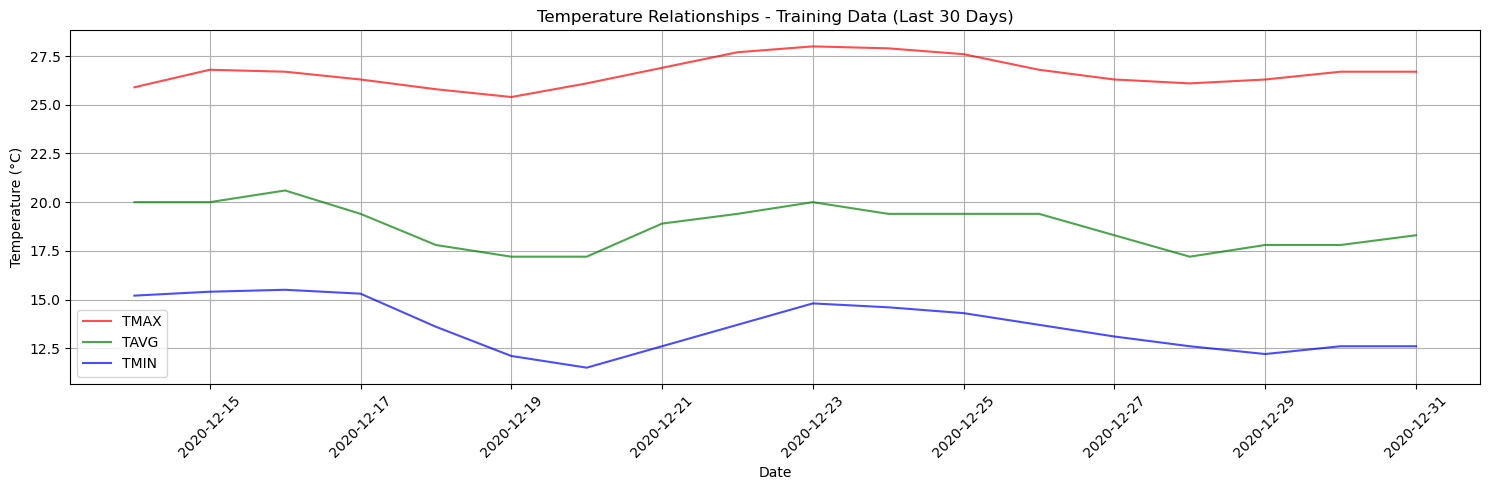

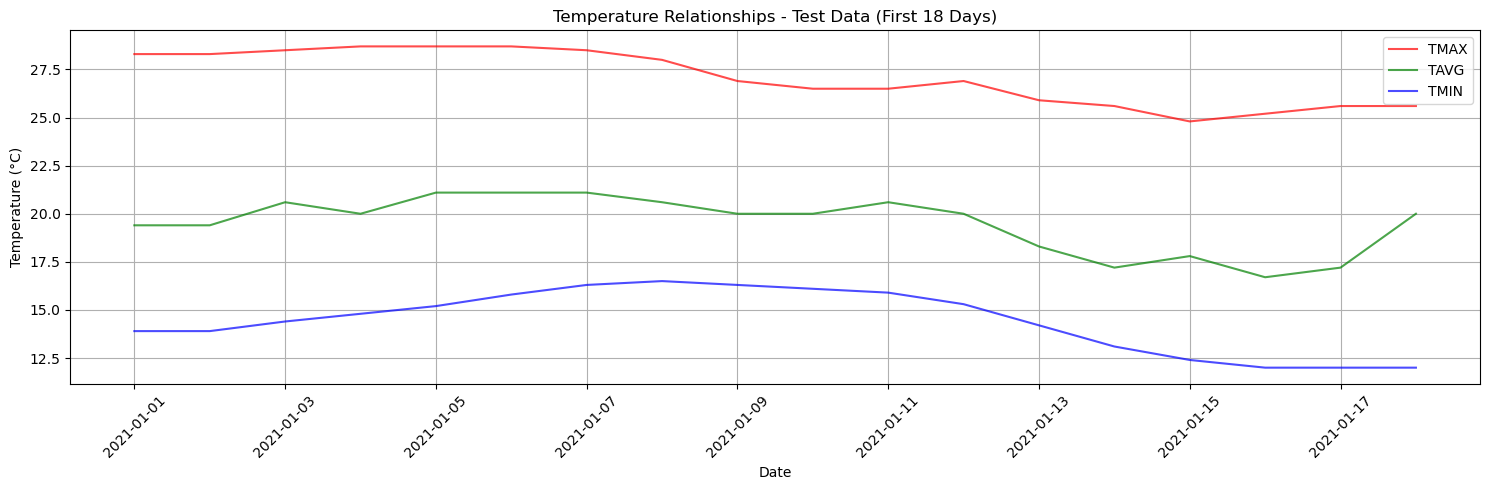

In [73]:
from sklearn.impute import KNNImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def impute_temperature(df):
    df = df.copy()
    df[['TMAX', 'TMIN']] = df[['TMAX', 'TMIN']].interpolate(method='linear')
    imputer = KNNImputer(n_neighbors=5)
    temp_cols = ['TMAX', 'TMIN']
    df[temp_cols] = imputer.fit_transform(df[temp_cols])
    valid_range = df['TMAX'] - df['TMIN']
    median_range = valid_range.median()
    
    for idx in df.index:
        tmax = df.loc[idx, 'TMAX']
        tmin = df.loc[idx, 'TMIN']
        tavg = df.loc[idx, 'TAVG']
        
        if tmax < tavg:
            df.loc[idx, 'TMAX'] = tavg + (median_range / 4)
        
        if tmin > tavg:
            df.loc[idx, 'TMIN'] = tavg - (median_range / 4)
        
        if df.loc[idx, 'TMIN'] >= df.loc[idx, 'TMAX']:
            middle = (df.loc[idx, 'TMIN'] + df.loc[idx, 'TMAX']) / 2
            df.loc[idx, 'TMAX'] = middle + (median_range / 4)
            df.loc[idx, 'TMIN'] = middle - (median_range / 4)
    
    df['TMAX'] = np.maximum(df['TMAX'], df['TAVG'])
    df['TMIN'] = np.minimum(df['TMIN'], df['TAVG'])
    window = 3
    df['TMAX'] = df['TMAX'].rolling(window=window, center=True).mean().ffill().bfill().round(1)
    df['TMIN'] = df['TMIN'].rolling(window=window, center=True).mean().ffill().bfill().round(1)
    
    return df

def validate_temperature_relationships(df):
    violations = {
        'tmax_less_than_tavg': (df['TMAX'] < df['TAVG']).sum(),
        'tmin_greater_than_tavg': (df['TMIN'] > df['TAVG']).sum(),
        'tmin_greater_than_tmax': (df['TMIN'] > df['TMAX']).sum()
    }
    
    print("\nTemperature Relationship Validation:")
    print(f"TMAX < TAVG violations: {violations['tmax_less_than_tavg']}")
    print(f"TMIN > TAVG violations: {violations['tmin_greater_than_tavg']}")
    print(f"TMIN > TMAX violations: {violations['tmin_greater_than_tmax']}")
    
    print("\nTemperature Statistics:")
    print(df[['TMAX', 'TAVG', 'TMIN']].describe())
    
    return violations

print("Processing training data...")
df_train_imputed = impute_temperature(df_train)
train_violations = validate_temperature_relationships(df_train_imputed)

print("\nProcessing test data...")
df_test_imputed = impute_temperature(df_test)
test_violations = validate_temperature_relationships(df_test_imputed)

def plot_temperature_relationships(df, title):
    plt.figure(figsize=(15, 5))
    plt.plot(df.index, df['TMAX'], label='TMAX', color='red', alpha=0.7)
    plt.plot(df.index, df['TAVG'], label='TAVG', color='green', alpha=0.7)
    plt.plot(df.index, df['TMIN'], label='TMIN', color='blue', alpha=0.7)
    plt.title(f'Temperature Relationships - {title}')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

sample_days = 18
plot_temperature_relationships(df_train_imputed[-sample_days:], 'Training Data (Last 30 Days)')
plot_temperature_relationships(df_test_imputed[:sample_days], 'Test Data (First 18 Days)')

df_train = df_train_imputed
df_test = df_test_imputed


In [74]:
df_train[df_train.PRCP.isnull()]

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
2014-08-23,NaN,27.2,29.6,25.0
2016-04-29,NaN,28.3,33.1,20.7


In [75]:
print(df_train.loc['2014-08-22':'2014-08-24'])
print('=============================================')
print('=============================================')
print(df_train.loc['2016-04-28':'2016-04-30'])

            PRCP  TAVG  TMAX  TMIN
DATE                              
2014-08-22  1.73  26.7  31.1  25.2
2014-08-23   NaN  27.2  29.6  25.0
2014-08-24  1.95  25.6  28.2  24.4
            PRCP  TAVG  TMAX  TMIN
DATE                              
2016-04-28  0.71  27.8  32.4  21.7
2016-04-29   NaN  28.3  33.1  20.7
2016-04-30  1.24  28.9  31.6  20.6


Findings: For both NaN values, we found that the day before and after have `PRCP` values, that means those values are missing and maybe accidental missing. So, we need imputation. A good solution is to use interpolation as rain precipitation usually follows similar patterns.

18. Interpolate missing precipitation values in the training datasets.

In [76]:
df_train['PRCP'] = df_train['PRCP'].interpolate(method='linear')

In [77]:
print(df_train.loc['2014-08-22':'2014-08-24'])
print('================================================')
print('================================================')
print(df_train.loc['2016-04-28':'2016-04-30'])

            PRCP  TAVG  TMAX  TMIN
DATE                              
2014-08-22  1.73  26.7  31.1  25.2
2014-08-23  1.84  27.2  29.6  25.0
2014-08-24  1.95  25.6  28.2  24.4
             PRCP  TAVG  TMAX  TMIN
DATE                               
2016-04-28  0.710  27.8  32.4  21.7
2016-04-29  0.975  28.3  33.1  20.7
2016-04-30  1.240  28.9  31.6  20.6


19. Check for any remaining missing values in the training and test datasets after interpolation.

In [78]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

PRCP    0
TAVG    0
TMAX    0
TMIN    0
dtype: int64
PRCP    0
TAVG    0
TMAX    0
TMIN    0
dtype: int64


20. Plot a correlation matrix to visualize the relationships between different features in the training dataset.

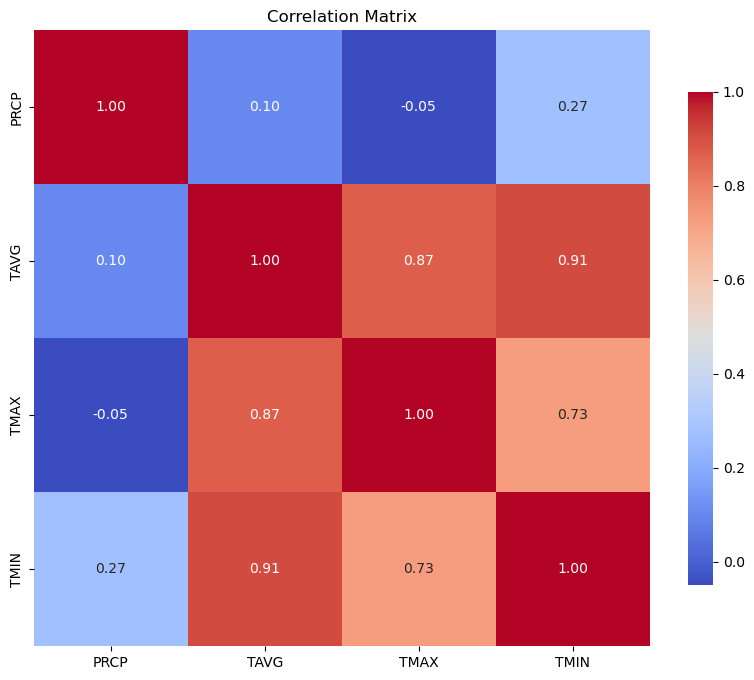

In [79]:
import seaborn as sns
correlation = df_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

21. Display the first few rows of the imputed training dataset.

In [80]:
df_train.head()

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
2014-01-01,0.0,16.7,25.8,13.1
2014-01-02,0.0,18.3,25.8,13.1
2014-01-03,0.0,17.2,25.2,12.0
2014-01-04,0.0,17.8,24.8,11.4
2014-01-05,0.0,16.1,24.3,11.8


22. Display the first few rows of the imputed test dataset.

In [81]:
df_test.head()

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
2021-01-01,0.0,19.4,28.3,13.9
2021-01-02,0.0,19.4,28.3,13.9
2021-01-03,0.0,20.6,28.5,14.4
2021-01-04,0.0,20.0,28.7,14.8
2021-01-05,0.0,21.1,28.7,15.2


23. Import necessary libraries for model training and evaluation.

In [82]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

24. Create additional features for the dataset to be used in model training.

In [83]:
def create_features(df, target):
    df = df.copy()
    features = pd.DataFrame(index=df.index)
    
    features['temp'] = df[target]
    features['temp_range'] = df['TMAX'] - df['TMIN']
    
    for i in [1, 2]:
        for temp_type in ['TAVG', 'TMAX', 'TMIN']:
            features[f'{temp_type.lower()}_lag_{i}'] = df[temp_type].shift(i)
    
    for window in [7, 14]:
        features[f'roll_mean_{window}'] = df[target].rolling(window=window).mean()
        features[f'roll_std_{window}'] = df[target].rolling(window=window).std()
        features[f'ewm_mean_{window}'] = df[target].ewm(span=window, adjust=False).mean()
        features[f'ewm_std_{window}'] = df[target].ewm(span=window, adjust=False).std()
    
    features['temp_momentum'] = features['temp'] - features['roll_mean_7']
    features['temp_acceleration'] = features['temp_momentum'].diff()
    
    features['month_sin'] = np.sin(2 * np.pi * df.index.month/12)
    features['month_cos'] = np.cos(2 * np.pi * df.index.month/12)
    features['day_sin'] = np.sin(2 * np.pi * df.index.dayofyear/365.25)
    features['day_cos'] = np.cos(2 * np.pi * df.index.dayofyear/365.25)
    
    return features

25. Initialize dictionaries to store models and scalers for each temperature type.

In [84]:
models = {'TAVG': {}, 'TMAX': {}, 'TMIN': {}}
scalers = {'TAVG': StandardScaler(), 'TMAX': StandardScaler(), 'TMIN': StandardScaler()}
feature_columns = None

26. Train XGBoost and Random Forest models for each temperature type using hyperparameter tuning.

In [85]:
from sklearn.model_selection import RandomizedSearchCV
import pickle

def train_models(df_train):
    global feature_columns
    param_grid_xgb = {
        'n_estimators': [200, 300, 400],
        'learning_rate': [0.03, 0.05, 0.07],
        'max_depth': [4, 5, 6],
        'min_child_weight': [3, 5, 7],
        'subsample': [0.8, 0.85, 0.9],
        'colsample_bytree': [0.8, 0.85, 0.9]
    }
    
    param_grid_rf = {
        'n_estimators': [100, 150, 200],
        'max_depth': [6, 8, 10],
        'min_samples_split': [2, 5, 7],
        'min_samples_leaf': [2, 4, 6]
    }

    for temp_type in ['TMAX', 'TAVG', 'TMIN']:
        features = create_features(df_train, temp_type)
        X = features.drop(['temp'], axis=1)
        y = features['temp']

        if feature_columns is None:
            feature_columns = X.columns

        X = X.ffill().bfill()
        X_scaled = scalers[temp_type].fit_transform(X)

        # Hyperparameter Tuning (Limited Search)
        xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
        xgb_search = RandomizedSearchCV(
            xgb_model, param_grid_xgb, n_iter=15, cv=5, scoring='neg_mean_squared_error',
            verbose=0, n_jobs=-1, random_state=42
        )
        xgb_search.fit(X_scaled, y)

        rf_model = RandomForestRegressor(random_state=42)
        rf_search = RandomizedSearchCV(
            rf_model, param_grid_rf, n_iter=15, cv=5, scoring='neg_mean_squared_error',
            verbose=0, n_jobs=-1, random_state=42
        )
        rf_search.fit(X_scaled, y)

        models[temp_type] = {
            'xgb': xgb_search.best_estimator_,
            'rf': rf_search.best_estimator_
        }

        print(f"{temp_type} - Best XGB params: {xgb_search.best_params_}")
        print(f"{temp_type} - Best RF params: {rf_search.best_params_}")

        for name, model in models[temp_type].items():
            filename = f'model_{temp_type}_{name}.pkl'
            with open(filename, 'wb') as file:
                pickle.dump(model, file)
            print(f"Model for {temp_type} ({name}) saved to {filename}")


27. Make predictions using the trained models and calculate confidence intervals.

In [ ]:
def make_predictions(df_test, return_confidence=False):
    predictions, confidence_intervals = {}, {}
    best_score = float('inf')
    best_weights = None
    results = []

    for xgb_weight in np.linspace(0.01, 0.99, 100):  # Try weights from 0.0 to 1.0 in steps of 0.1
        rf_weight = 1 - xgb_weight
        weights = {'xgb': xgb_weight, 'rf': rf_weight}
        
        temp_predictions_dict = {}  # Store predictions for this weight set
        temp_confidence_dict = {}  # Store confidence intervals
        total_mse = 0  # Track overall error for all temp types

        for temp_type in ['TMAX', 'TAVG', 'TMIN']:
            features = create_features(df_test, temp_type)
            X_test = features.drop(['temp'], axis=1)
            y_test = features['temp'].values  # Convert to NumPy array for MSE calculation
            X_test = X_test.ffill().bfill()
            X_test_scaled = scalers[temp_type].transform(X_test)
            
            temp_predictions = []
            for name, model in models[temp_type].items():
                pred = model.predict(X_test_scaled)
                temp_predictions.append(pred * weights[name])

            # Final prediction for this temp type
            temp_predictions_dict[temp_type] = np.sum(temp_predictions, axis=0)
            
            # Compute MSE for this temp type
            mse = mean_squared_error(y_test, temp_predictions_dict[temp_type])
            total_mse += mse

            if return_confidence:
                weights_array = np.array(list(weights.values()))
                weights_array[weights_array == 0] = 1e-10
                predictions_array = np.array(temp_predictions) / weights_array[:, None]
                
                std_pred = np.std(predictions_array, axis=0)
                temp_confidence_dict[temp_type] = {
                    'lower_95': temp_predictions_dict[temp_type] - 1.96 * std_pred,
                    'upper_95': temp_predictions_dict[temp_type] + 1.96 * std_pred
                }

        avg_mse = total_mse / 3
        results.append((weights, avg_mse))

        if avg_mse < best_score:
            best_score = avg_mse
            best_weights = weights
            predictions = temp_predictions_dict.copy()
            confidence_intervals = temp_confidence_dict.copy()
        
        print(f"Weights: {weights}, MSE: {avg_mse}")

    print(f"\nBest Weights: {best_weights}, Best MSE: {best_score}")

    # Apply final consistency rules
    predictions['TMAX'] = np.maximum(predictions['TMAX'], predictions['TAVG'])
    predictions['TMIN'] = np.minimum(predictions['TMIN'], predictions['TAVG'])

    return (predictions, confidence_intervals) if return_confidence else predictions


28. Evaluate the performance of the predictions using RMSE and MAE metrics.

In [87]:
def evaluate_predictions(predictions, df_test, start_date, end_date):
    mask = (df_test.index >= start_date) & (df_test.index <= end_date)
    df_filtered = df_test.loc[mask]
    
    for temp_type in ['TMAX', 'TAVG', 'TMIN']:
        if temp_type not in predictions:
            print(f"Warning: Missing predictions for {temp_type}")
            continue
        
        actual = df_filtered[temp_type].values
        pred = predictions[temp_type][:len(actual)]

        rmse = np.sqrt(mean_squared_error(actual, pred))
        mae = mean_absolute_error(actual, pred)

        print(f"\n{temp_type} Performance:")
        print(f"RMSE: {rmse:.3f}°C")
        print(f"MAE: {mae:.3f}°C")


29. Plot the predictions along with original values and previous dates for proper visualizations

In [88]:
def plot_predictions(df_train, df_test, predictions, confidence_intervals, start_date, end_date):
    actual = (df_test.index >= start_date) & (df_test.index <= end_date)
    colors = {'TMAX': 'red', 'TAVG': 'green', 'TMIN': 'blue'}
    previous_days = -45
    plt.figure(figsize=(15, 8))
    for temp_type in ['TMAX', 'TAVG', 'TMIN']:
        plt.plot(df_train.index[previous_days:], df_train[temp_type][previous_days:], color=colors[temp_type], alpha=0.7, label=f'{temp_type} Historical')
        plt.plot(df_test[actual].index, predictions[temp_type][:len(df_test[actual])], color=colors[temp_type], linestyle='--', label=f'{temp_type} Predicted')
        plt.plot(df_test[actual].index, df_test[actual][temp_type], color=colors[temp_type], label=f'{temp_type} Actual')
        plt.fill_between(df_test[actual].index, confidence_intervals[temp_type]['lower_95'][:len(df_test[actual])], confidence_intervals[temp_type]['upper_95'][:len(df_test[actual])], color=colors[temp_type], alpha=0.2)
    
    plt.title('Temperature Predictions with Confidence Intervals')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

30. Fill the missing dates using the trained ensemble model

In [89]:
def fill_missing_dates(df):
    date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
    df_filled = df.reindex(date_range)
    features = create_features(df_filled, 'TAVG')
    X_missing = features.drop(['temp'], axis=1)
    X_missing = X_missing.ffill().bfill()
    missing_indices = df_filled.index[df_filled['TAVG'].isna()]
    
    if len(missing_indices) > 0:
        print(f"Found {len(missing_indices)} missing dates. Predicting values...")
        
        for temp_type in ['TMAX', 'TAVG', 'TMIN']:
            X_missing_scaled = scalers[temp_type].transform(X_missing.loc[missing_indices])
            xgb_pred = models[temp_type]['xgb'].predict(X_missing_scaled)
            rf_pred = models[temp_type]['rf'].predict(X_missing_scaled)
            final_pred = 0.99 * xgb_pred + 0.01 * rf_pred
            df_filled.loc[missing_indices, temp_type] = final_pred
        
        df_filled.loc[missing_indices, 'TMAX'] = np.maximum(
            df_filled.loc[missing_indices, 'TMAX'],
            df_filled.loc[missing_indices, 'TAVG']
        )
        df_filled.loc[missing_indices, 'TMIN'] = np.minimum(
            df_filled.loc[missing_indices, 'TMIN'],
            df_filled.loc[missing_indices, 'TAVG']
        )
        
        window = 3
        df_filled['TMAX'] = df_filled['TMAX'].rolling(window=window, center=True).mean().ffill().bfill()
        df_filled['TAVG'] = df_filled['TAVG'].rolling(window=window, center=True).mean().ffill().bfill()
        df_filled['TMIN'] = df_filled['TMIN'].rolling(window=window, center=True).mean().ffill().bfill()
    
    return df_filled


31. Validate the date continuity after applying model predictions to fill the missing dates (Function)

In [90]:
def validate_date_continuity(df):
    """
    Validate that there are no gaps in the dates.
    """
    date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
    missing_dates = set(date_range) - set(df.index)
    
    if missing_dates:
        print(f"Found {len(missing_dates)} missing dates:")
        print(sorted(missing_dates)[:5], "..." if len(missing_dates) > 5 else "")
    else:
        print("No missing dates found.")
    
    return len(missing_dates) == 0

32. Train the model

In [91]:
train_models(df_train)

TMAX - Best XGB params: {'subsample': 0.85, 'n_estimators': 400, 'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
TMAX - Best RF params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}
Model for TMAX (xgb) saved to model_TMAX_xgb.pkl
Model for TMAX (rf) saved to model_TMAX_rf.pkl
TAVG - Best XGB params: {'subsample': 0.8, 'n_estimators': 400, 'min_child_weight': 7, 'max_depth': 6, 'learning_rate': 0.03, 'colsample_bytree': 0.8}
TAVG - Best RF params: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 8}
Model for TAVG (xgb) saved to model_TAVG_xgb.pkl
Model for TAVG (rf) saved to model_TAVG_rf.pkl
TMIN - Best XGB params: {'subsample': 0.85, 'n_estimators': 400, 'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
TMIN - Best RF params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}
Model for TMIN (xgb) saved 

33. Fill the missing dates

In [92]:
print("Filling missing dates in training data...")
df_train = fill_missing_dates(df_train)

Filling missing dates in training data...
Found 437 missing dates. Predicting values...


34. Validate the date continuity after applying model predictions to fill the missing dates

In [93]:
validate_date_continuity(df_train)

No missing dates found.


True

35. Make predictions on the complete dataset using real values

In [94]:
predictions, confidence_intervals = make_predictions(df_test, return_confidence=True)

Weights: {'xgb': 0.01, 'rf': 0.99}, MSE: 0.11223109350577831
Weights: {'xgb': 0.0198989898989899, 'rf': 0.9801010101010101}, MSE: 0.11188750574885542
Weights: {'xgb': 0.029797979797979796, 'rf': 0.9702020202020202}, MSE: 0.11154824648272509
Weights: {'xgb': 0.039696969696969696, 'rf': 0.9603030303030303}, MSE: 0.11121332134022294
Weights: {'xgb': 0.049595959595959596, 'rf': 0.9504040404040404}, MSE: 0.11088272729090343
Weights: {'xgb': 0.059494949494949496, 'rf': 0.9405050505050505}, MSE: 0.11055644170369072
Weights: {'xgb': 0.06939393939393938, 'rf': 0.9306060606060607}, MSE: 0.11023450163213845
Weights: {'xgb': 0.07929292929292929, 'rf': 0.9207070707070707}, MSE: 0.10991688848757768
Weights: {'xgb': 0.08919191919191918, 'rf': 0.9108080808080808}, MSE: 0.10960360379272482
Weights: {'xgb': 0.09909090909090908, 'rf': 0.9009090909090909}, MSE: 0.10929464557882101
Weights: {'xgb': 0.10898989898989898, 'rf': 0.891010101010101}, MSE: 0.1089900079404141
Weights: {'xgb': 0.11888888888888888, 

36. Evaluate the prediction with actual values

In [95]:
evaluate_predictions(predictions, df_test, "2021-01-01", "2021-01-18")


TMAX Performance:
RMSE: 0.286°C
MAE: 0.224°C

TAVG Performance:
RMSE: 0.347°C
MAE: 0.229°C

TMIN Performance:
RMSE: 0.305°C
MAE: 0.216°C


37. Visualize the predictions along with real values for understanding the model efficiency

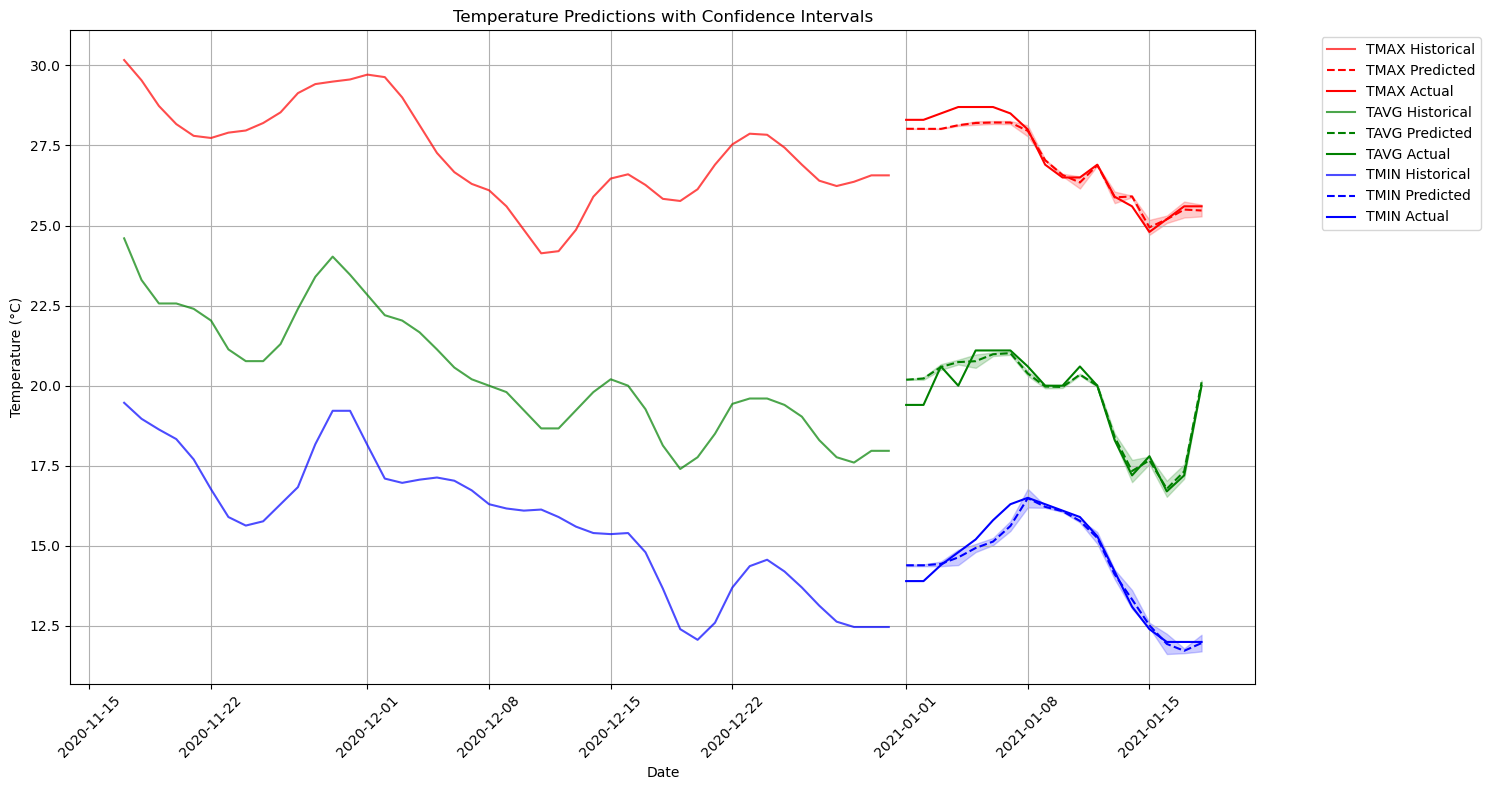

In [96]:
plot_predictions(df_train, df_test, predictions, confidence_intervals, "2021-01-01", "2021-01-18")

In [97]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
import pickle

def train_models(df_train):
    global feature_columns
    for temp_type in ['TMAX', 'TAVG', 'TMIN']:
        features = create_features(df_train, temp_type)
        X = features.drop(['temp'], axis=1)
        y = features['temp']

        if feature_columns is None:
            feature_columns = X.columns

        X = X.ffill().bfill()
        X_scaled = scalers[temp_type].fit_transform(X)

        models[temp_type] = xgb.XGBRegressor(
            n_estimators=400, learning_rate=0.05, max_depth=5,
            min_child_weight=3, subsample=0.85, colsample_bytree=0.85,
            reg_alpha=0.1, reg_lambda=1.0, gamma=0.15, random_state=42
        )

        models[temp_type].fit(X_scaled, y)
        filename = f'XGBoost_model_{temp_type}.pkl'
        with open(filename, 'wb') as file:
            pickle.dump(models[temp_type], file)

        print(f"Model for {temp_type} saved to {filename}")

In [ ]:
def make_predictions(df_test, return_confidence=False):
    predictions = {}
    confidence_intervals = {}

    for temp_type in ['TMAX', 'TAVG', 'TMIN']:
        features = create_features(df_test, temp_type)
        X_test = features.drop(['temp'], axis=1)
        X_test = X_test.ffill().bfill()
        X_test_scaled = scalers[temp_type].transform(X_test)

        pred = models[temp_type].predict(X_test_scaled)
        predictions[temp_type] = pred

        if return_confidence:
            std_pred = np.std(pred)
            confidence_intervals[temp_type] = {
                'lower_95': pred - 1.96 * std_pred,
                'upper_95': pred + 1.96 * std_pred
            }

    predictions['TMAX'] = np.maximum(predictions['TMAX'], predictions['TAVG'])
    predictions['TMIN'] = np.minimum(predictions['TMIN'], predictions['TAVG'])

    return (predictions, confidence_intervals) if return_confidence else predictions


In [99]:
train_models(df_train)

Model for TMAX saved to XGBoost_model_TMAX.pkl
Model for TAVG saved to XGBoost_model_TAVG.pkl
Model for TMIN saved to XGBoost_model_TMIN.pkl


In [100]:
predictions, confidence_intervals = make_predictions(df_test, return_confidence=True)

In [101]:
evaluate_predictions(predictions, df_test, "2021-01-01", "2021-01-18")


TMAX Performance:
RMSE: 0.163°C
MAE: 0.135°C

TAVG Performance:
RMSE: 0.504°C
MAE: 0.326°C

TMIN Performance:
RMSE: 0.212°C
MAE: 0.163°C


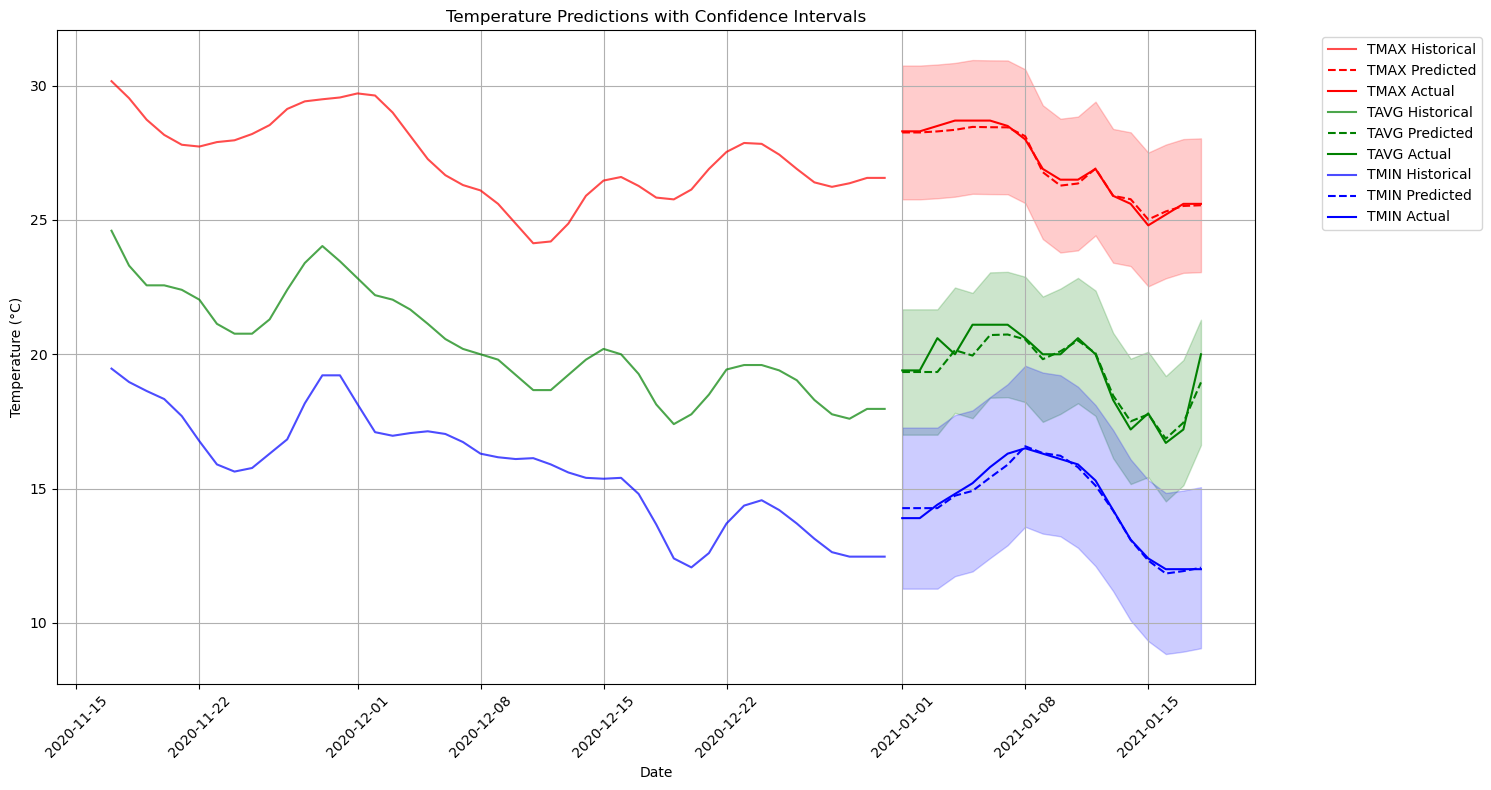

In [102]:
plot_predictions(df_train, df_test, predictions, confidence_intervals, "2021-01-01", "2021-01-18")

# Complete Pipeline

In [ ]:
def load_models(temp_types):
    loaded_models = {}
    for temp_type in temp_types:
        loaded_models[temp_type] = {}
        for model_name in ['xgb', 'rf']:
            filename = f'model_{temp_type}_{model_name}.pkl'
            with open(filename, 'rb') as file:
                loaded_models[temp_type][model_name] = pickle.load(file)
            print(f"Model for {temp_type} ({model_name}) loaded from {filename}")
    return loaded_models

# Example usage
models = load_models(['TMAX', 'TAVG', 'TMIN'])
predictions, confidence_intervals = make_predictions(df_test,  return_confidence=True)

SyntaxError: invalid syntax (2918956960.py, line 3)